In [92]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.integrate import odeint
from matplotlib.pyplot import MultipleLocator


#*----------------------------------------------------------------
mpl.rcParams['font.sans-serif'] = ['SimHei']# *允许显示中文
plt.rcParams['axes.unicode_minus']=False# *允许显示坐标轴负数
#*----------------------------------------------------------------

In [93]:
half_decline = 1/6 * np.log(6) 
def module1(w, t, gs, gr, ks, kr, EC_50s, EC_50r, R0, Nmax, C0): #* C0为初始药物浓度 
    # *给出位置矢量w，和若干参数
    # *dx/dt, dy/dt, dz/dt的值
    S, R = w.tolist()
    C = C0 * np.exp( - half_decline * (t%12)) #* 药物浓度C随时间的变化 12为给药周期
    dS = (gs*((Nmax - S - R) /Nmax) - ks * C/( C + EC_50s) ) * S
    dR = (gr*((Nmax - S - R) /Nmax) - kr * C/( C + EC_50r) ) * R
    
    return dS,dR


In [94]:
init_differ_time = 12 #* 初始给药时间差，第一次药物1给完药后间隔多少时间药物2再给药 ， 间隔时间为这个init_differ_time
def module2(w , t , gs1 , gs2 , gr1 , gr2 , 
                    ks1_1 , ks1_2 , kr1_1 , kr1_2 , 
                    ks2_1 , ks2_2 , kr2_1 , kr2_2 ,
                    EC_50s1_1 , EC_50s1_2 , EC_50r1_1 , EC_50r1_2 ,
                    EC_50s2_1 , EC_50s2_2 , EC_50r2_1 , EC_50r2_2 , 
                    Nmax , 
                    C0_1 , half_decline1 , duration1 ,
                    C0_2 , half_decline2 , duration2 ):  
                    #* 分为药物1和药物2    对药物1敏感的s1和不敏感的r1    以及对药物2敏感的s2和不敏感的r2
                    #* EC_50s1_2表示对药物1敏感的S1关于药物2的EC_50的浓度 同理可得
                    #* C0_1为药物1的初始浓度 C0_2为药物2的初始浓度
                    #* half_decline为对应药物的半衰期 duration为对应药物的给药间隔
    S1 , R1 , S2 , R2 = w.tolist()
    totalnum = S1 + S2 + R1 + R2
    C1 = C0_1 * np.exp( - half_decline1 * (t % duration1))
    if(t >= init_differ_time):
        C2 = C0_2 * np.exp( - half_decline2 * ((t - init_differ_time) % duration2))
    else:
        C2 = 0
    dS1 = (gs1 * ((Nmax - totalnum) / Nmax) - ks1_1 * C1 / ( C1 + EC_50s1_1 ) - ks1_2 * C2 / ( C2 + EC_50s1_2 ) + ks1_1 * C1 / ( C1 + EC_50s1_1 ) * ks1_2 * C2 / ( C2 + EC_50s1_2 )) * S1
    dR1 = (gs2 * ((Nmax - totalnum) / Nmax) - kr1_1 * C1 / ( C1 + EC_50r1_1 ) - kr1_2 * C2 / ( C2 + EC_50r1_2 ) + kr1_1 * C1 / ( C1 + EC_50r1_1 ) * kr1_2 * C2 / ( C2 + EC_50r1_2 )) * R1
    dS2 = (gr1 * ((Nmax - totalnum) / Nmax) - ks2_1 * C1 / ( C1 + EC_50s2_1 ) - ks2_2 * C2 / ( C2 + EC_50s2_2 ) + ks2_1 * C1 / ( C1 + EC_50s2_1 ) * ks2_2 * C2 / ( C2 + EC_50s2_2 )) * S2
    dR2 = (gr2 * ((Nmax - totalnum) / Nmax) - kr2_1 * C1 / ( C1 + EC_50r2_1 ) - kr2_2 * C2 / ( C2 + EC_50r2_2 ) + kr2_1 * C1 / ( C1 + EC_50r2_1 ) * kr2_2 * C2 / ( C2 + EC_50r2_2 )) * R2
    
    return dS1 , dR1 , dS2 , dR2 

In [95]:
main_duration = 4 #* 每种药物独立给6天 注意跟下面的duration配合 要想更改给药天数就改这里就好了
def module3(w , t , gs1 , gs2 , gr1 , gr2 , 
                    ks1_1 , ks1_2 , kr1_1 , kr1_2 , 
                    ks2_1 , ks2_2 , kr2_1 , kr2_2 ,
                    EC_50s1_1 , EC_50s1_2 , EC_50r1_1 , EC_50r1_2 ,
                    EC_50s2_1 , EC_50s2_2 , EC_50r2_1 , EC_50r2_2 , 
                    Nmax , 
                    C0_1 , half_decline1 , duration1 ,
                    C0_2 , half_decline2 , duration2 ):  
                    #* 分为药物1和药物2    对药物1敏感的s1和不敏感的r1    以及对药物2敏感的s2和不敏感的r2
                    #* EC_50s1_2表示对药物1敏感的S1关于药物2的EC_50的浓度 同理可得
                    #* C0_1为药物1的初始浓度 C0_2为药物2的初始浓度
                    #* half_decline为对应药物的半衰期 duration为对应药物的给药间隔
    S1 , R1 , S2 , R2 = w.tolist()
    totalnum = S1 + S2 + R1 + R2
    if(t <= main_duration * 24):
        C1 = C0_1 * np.exp( - half_decline1 * (t % duration1))
    else:
        C1 = 0
    if(t >= main_duration * 24):
        C2 = C0_2 * np.exp( - half_decline2 * ((t - main_duration * 24) % duration2))
    else:
        C2 = 0
    dS1 = (gs1 * ((Nmax - totalnum) / Nmax) - ks1_1 * C1 / ( C1 + EC_50s1_1 ) - ks1_2 * C2 / ( C2 + EC_50s1_2 ) + ks1_1 * C1 / ( C1 + EC_50s1_1 ) * ks1_2 * C2 / ( C2 + EC_50s1_2 )) * S1
    dR1 = (gs2 * ((Nmax - totalnum) / Nmax) - kr1_1 * C1 / ( C1 + EC_50r1_1 ) - kr1_2 * C2 / ( C2 + EC_50r1_2 ) + kr1_1 * C1 / ( C1 + EC_50r1_1 ) * kr1_2 * C2 / ( C2 + EC_50r1_2 )) * R1
    dS2 = (gr1 * ((Nmax - totalnum) / Nmax) - ks2_1 * C1 / ( C1 + EC_50s2_1 ) - ks2_2 * C2 / ( C2 + EC_50s2_2 ) + ks2_1 * C1 / ( C1 + EC_50s2_1 ) * ks2_2 * C2 / ( C2 + EC_50s2_2 )) * S2
    dR2 = (gr2 * ((Nmax - totalnum) / Nmax) - kr2_1 * C1 / ( C1 + EC_50r2_1 ) - kr2_2 * C2 / ( C2 + EC_50r2_2 ) + kr2_1 * C1 / ( C1 + EC_50r2_1 ) * kr2_2 * C2 / ( C2 + EC_50r2_2 )) * R2
    
    return dS1 , dR1 , dS2 , dR2 

In [96]:
t1 = np.arange(0, 96, 0.1) # * 创建时间点
t2 = np.arange(0, 96, 0.1) # * version2的时间节点
t3 = np.arange(0, main_duration * 2 * 24 , 0.1) # * version3的节点
# * 调用ode对该模型进行求解 
# * args_1 = (0.99 , 0.66 , 1.56 , 1.17 , 0.21 , 5.19 , 1.06 , 1.10e9, 0.01) # *  初始参数 各种参数，一一对应上面的module1 从gs开始
args_1 = (0.99 , 0.66 , 3 , 1 , 0.21 , 5.19 , 1.06 , 1.10e9, 0.1)
args_2 = (0.99 , 0.66 , 0.99 , 0.66 ,
            3 , 1 , 1.5 , 0.5 , 
            1.5 , 0.5 , 3 , 1 ,
            0.21 , 5.19 , 0.10 , 2.51 ,
            0.10 , 2.51 , 0.21 , 5.19 , 
            1.10e9 ,
            0.1 , 1/6 * np.log(6) , 24 ,
            0.1 , 1/6 * np.log(6) , 24
            )
args_3 = (0.99 , 0.66 , 0.99 , 0.66 ,
            3 , 1 , 1.5 , 0.5 , 
            1.5 , 0.5 , 3 , 1 ,
            0.21 , 5.19 , 0.10 , 2.51 ,
            0.10 , 2.51 , 0.21 , 5.19 , 
            1.10e9 ,
            0.1 , 1/6 * np.log(6) , 24 ,
            0.1 , 1/6 * np.log(6) , 24
            )
track1 = odeint(module1, (1e9 , 1e7), t1, args=args_1)
track2 = odeint(module2, (0.5e9 , 0.5e7 , 0.5e9 , 0.5e7) , t2 , args = args_2)#* module后面跟的元组的值 对应第1列是S1的值，第二列是R1的值以此类推
track3 = odeint(module3, (0.5e9 , 0.5e7 , 0.5e9 , 0.5e7) , t3 , args = args_3)
#*生成version2的药物浓度数据
C1_list_mod1 = []
C2_list_mod1 = []
for i in t2:
    C1_list_mod1.append(args_2[-6] * np.exp( - args_2[-5] * (i % args_2[-4])))
    if(i >= init_differ_time):
        C2_list_mod1.append(args_2[-3] * np.exp( - args_2[-2] * ((i - init_differ_time) % args_2[-1])))
    else:
        C2_list_mod1.append(0)
#*生成version3的药物的浓度数据
C1_list_mod2 = []
C2_list_mod2 = []
for i in t3:
    if(i <= main_duration * 24):
        C1_list_mod2.append(args_3[-6] * np.exp( - args_3[-5] * (i % args_3[-4])))
    else:
        C1_list_mod2.append(0)
    if(i >= main_duration * 24):
        C2_list_mod2.append(args_3[-3] * np.exp( - args_3[-2] * ((i - main_duration * 24) % args_3[-1])))
    else:
        C2_list_mod2.append(0)


1920 1920


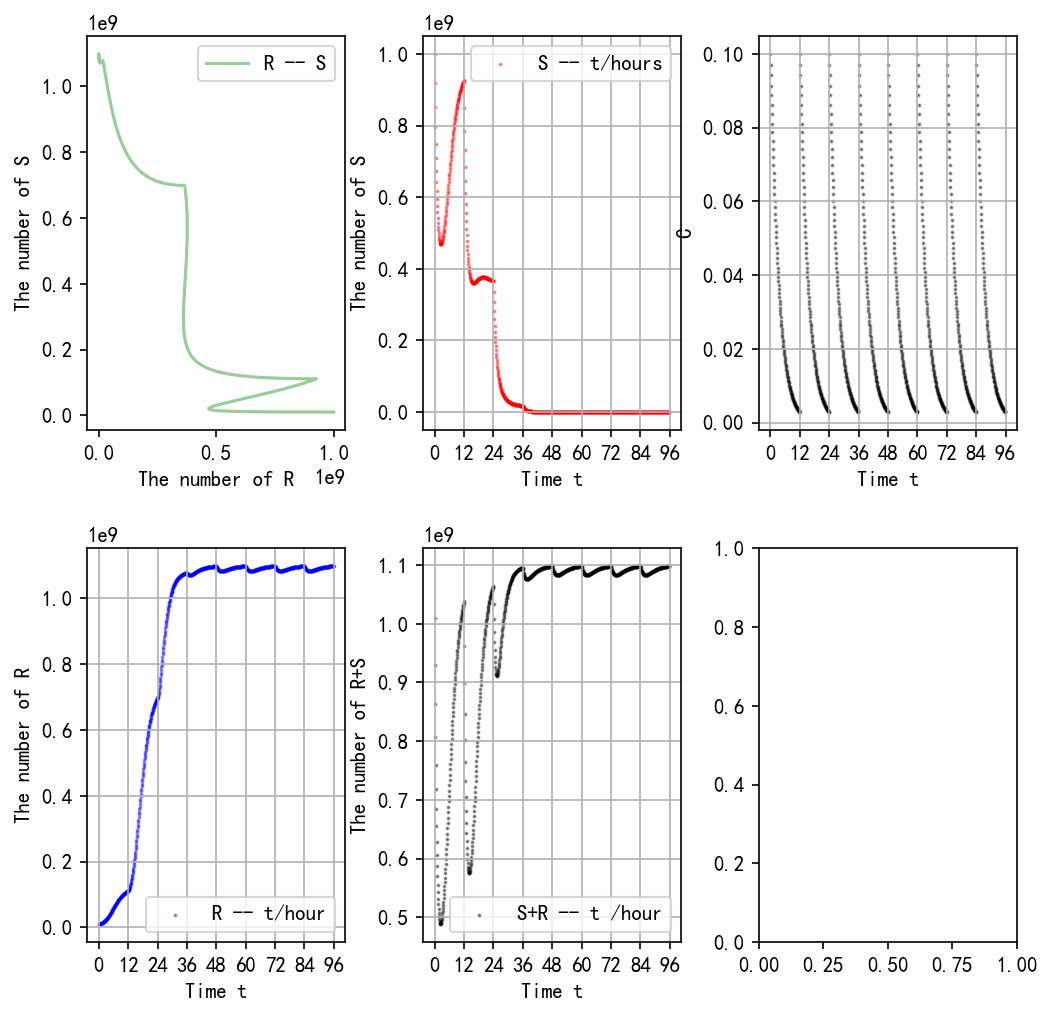

In [97]:
fig, axes = plt.subplots(2,3,figsize=(8,8),dpi = 150) # * model1的绘图
fig.patch.set_facecolor("white") #* 更改主图背景颜色，免得savefig的时候背景虚化
axes[0][0].plot(track1[:,0],track1[:,1],color = "green" , alpha = 0.4, label = "R -- S")

axes[0][1].scatter(t1,track1[:,0],s=0.7 , color = "red" ,alpha = 0.4,label = "S -- t/hours")

axes[1][0].scatter(t1,track1[:,1],s=0.7 , color = "blue" , alpha = 0.4,label = "R -- t/hour")

axes[1][1].scatter(t1,track1[:,0]+track1[:,1], s = 0.7 , color = "black" , alpha = 0.4, label = "S+R -- t /hour")

axes[0][2].scatter(t1,args_1[-1] * np.exp( - half_decline * (t%12)) , s=0.7 , color = "black" , alpha = 0.4, label = "C -- t/hour")
for i in range(2):
    for j in range(2):
        axes[i][j].legend()
# * 设置标签
axes[0][0].set_xlabel("The number of R")
axes[0][0].set_ylabel("The number of S")

axes[0][1].set_xlabel("Time t")
axes[0][1].set_ylabel("The number of S")

axes[0][2].set_xlabel("Time t")
axes[0][2].set_ylabel("C")

axes[1][0].set_xlabel("Time t")
axes[1][0].set_ylabel("The number of R")

axes[1][1].set_xlabel("Time t")
axes[1][1].set_ylabel("The number of R+S")
# * 设置刻度
x_major_locator = MultipleLocator(12)
axes[0][1].xaxis.set_major_locator(x_major_locator)
axes[0][2].xaxis.set_major_locator(x_major_locator)
axes[1][0].xaxis.set_major_locator(x_major_locator)
axes[1][1].xaxis.set_major_locator(x_major_locator)
axes[0][1].grid()
axes[0][2].grid()
axes[1][0].grid()
axes[1][1].grid()

plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)

plt.savefig("Version_1.png")

# plt.show()


# * 给药时间为每12小时给药，药物浓度随时间变化服从半衰期等于 1/12 * log(6) 的 exp 函数

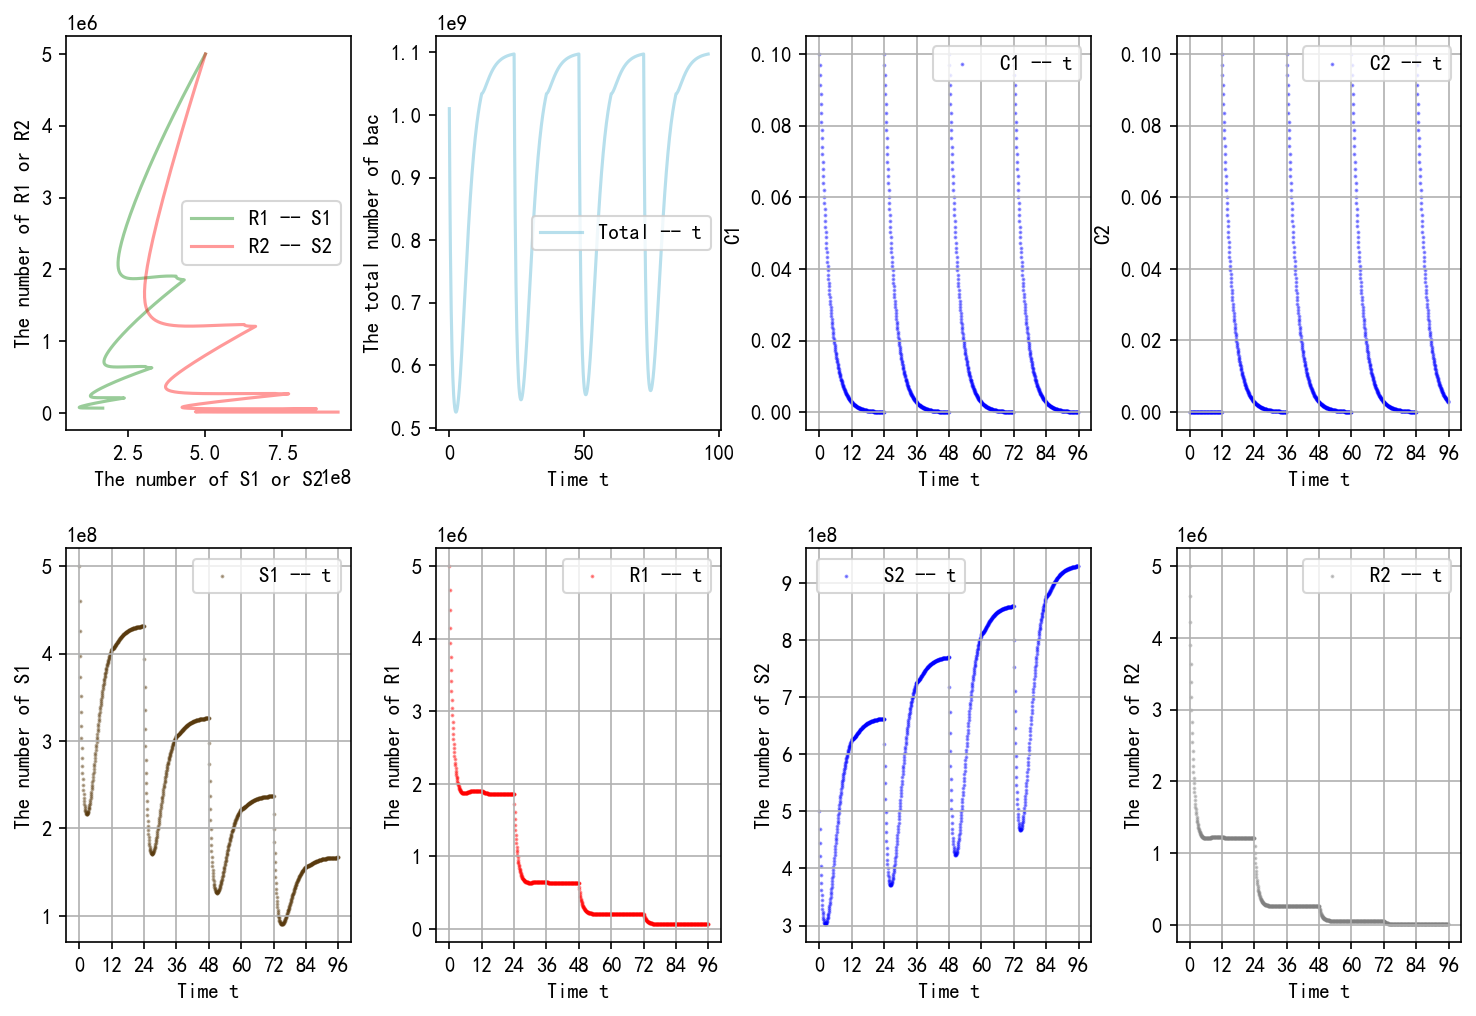

In [98]:
fig, axes = plt.subplots(2,4,figsize=(12,8),dpi = 150)
fig.patch.set_facecolor("white") #* 更改主图背景颜色，免得savefig的时候背景虚化
axes[0][0].plot(track2[:,0],track2[:,1],color = "green" , alpha = 0.4, label = "R1 -- S1")

axes[0][0].plot(track2[:,2],track2[:,3],color = "red" , alpha = 0.4, label = "R2 -- S2")

axes[0][1].plot(t2 , track2[:,0]+track2[:,1]+track2[:,2]+track2[:,3] , color = "#4bafd1" , alpha = 0.4, label = "Total -- t")

axes[0][2].scatter(t2 , C1_list_mod1 , s=0.7 , color = "blue" , alpha = 0.4 , label = "C1 -- t")

axes[0][3].scatter(t2 , C2_list_mod1 , s=0.7 , color = "blue" , alpha = 0.4 , label = "C2 -- t")

axes[1][0].scatter(t2 , track2[:,0],s=0.7 , color = "#593a0e" , alpha = 0.4, label = "S1 -- t")

axes[1][1].scatter(t2 , track2[:,1],s=0.7 , color = "red" , alpha = 0.4, label = "R1 -- t")

axes[1][2].scatter(t2 , track2[:,2],s=0.7 , color = "blue" , alpha = 0.4, label = "S2 -- t")

axes[1][3].scatter(t2 , track2[:,3],s=0.7 , color = "grey" , alpha = 0.4, label = "R2 -- t")


for i in range(2):
    for j in range(4):
        axes[i][j].legend()
# * 设置标签
axes[0][0].set_xlabel("The number of S1 or S2")
axes[0][0].set_ylabel("The number of R1 or R2")

axes[0][1].set_xlabel("Time t")
axes[0][1].set_ylabel("The total number of bac")

axes[0][2].set_xlabel("Time t")
axes[0][2].set_ylabel("C1")

axes[0][3].set_xlabel("Time t")
axes[0][3].set_ylabel("C2")

axes[1][0].set_xlabel("Time t")
axes[1][0].set_ylabel("The number of S1")

axes[1][1].set_xlabel("Time t")
axes[1][1].set_ylabel("The number of R1")

axes[1][2].set_xlabel("Time t")
axes[1][2].set_ylabel("The number of S2")

axes[1][3].set_xlabel("Time t")
axes[1][3].set_ylabel("The number of R2")

# * 设置刻度
x_major_locator = MultipleLocator(12) #* x坐标轴刻度间隔
axes[0][2].xaxis.set_major_locator(x_major_locator)
axes[0][2].grid()
axes[0][3].xaxis.set_major_locator(x_major_locator)
axes[0][3].grid()
for i in range(4):
    axes[1][i].xaxis.set_major_locator(x_major_locator)
    axes[1][i].grid()

plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)

plt.savefig("Version_2.png")

plt.show()

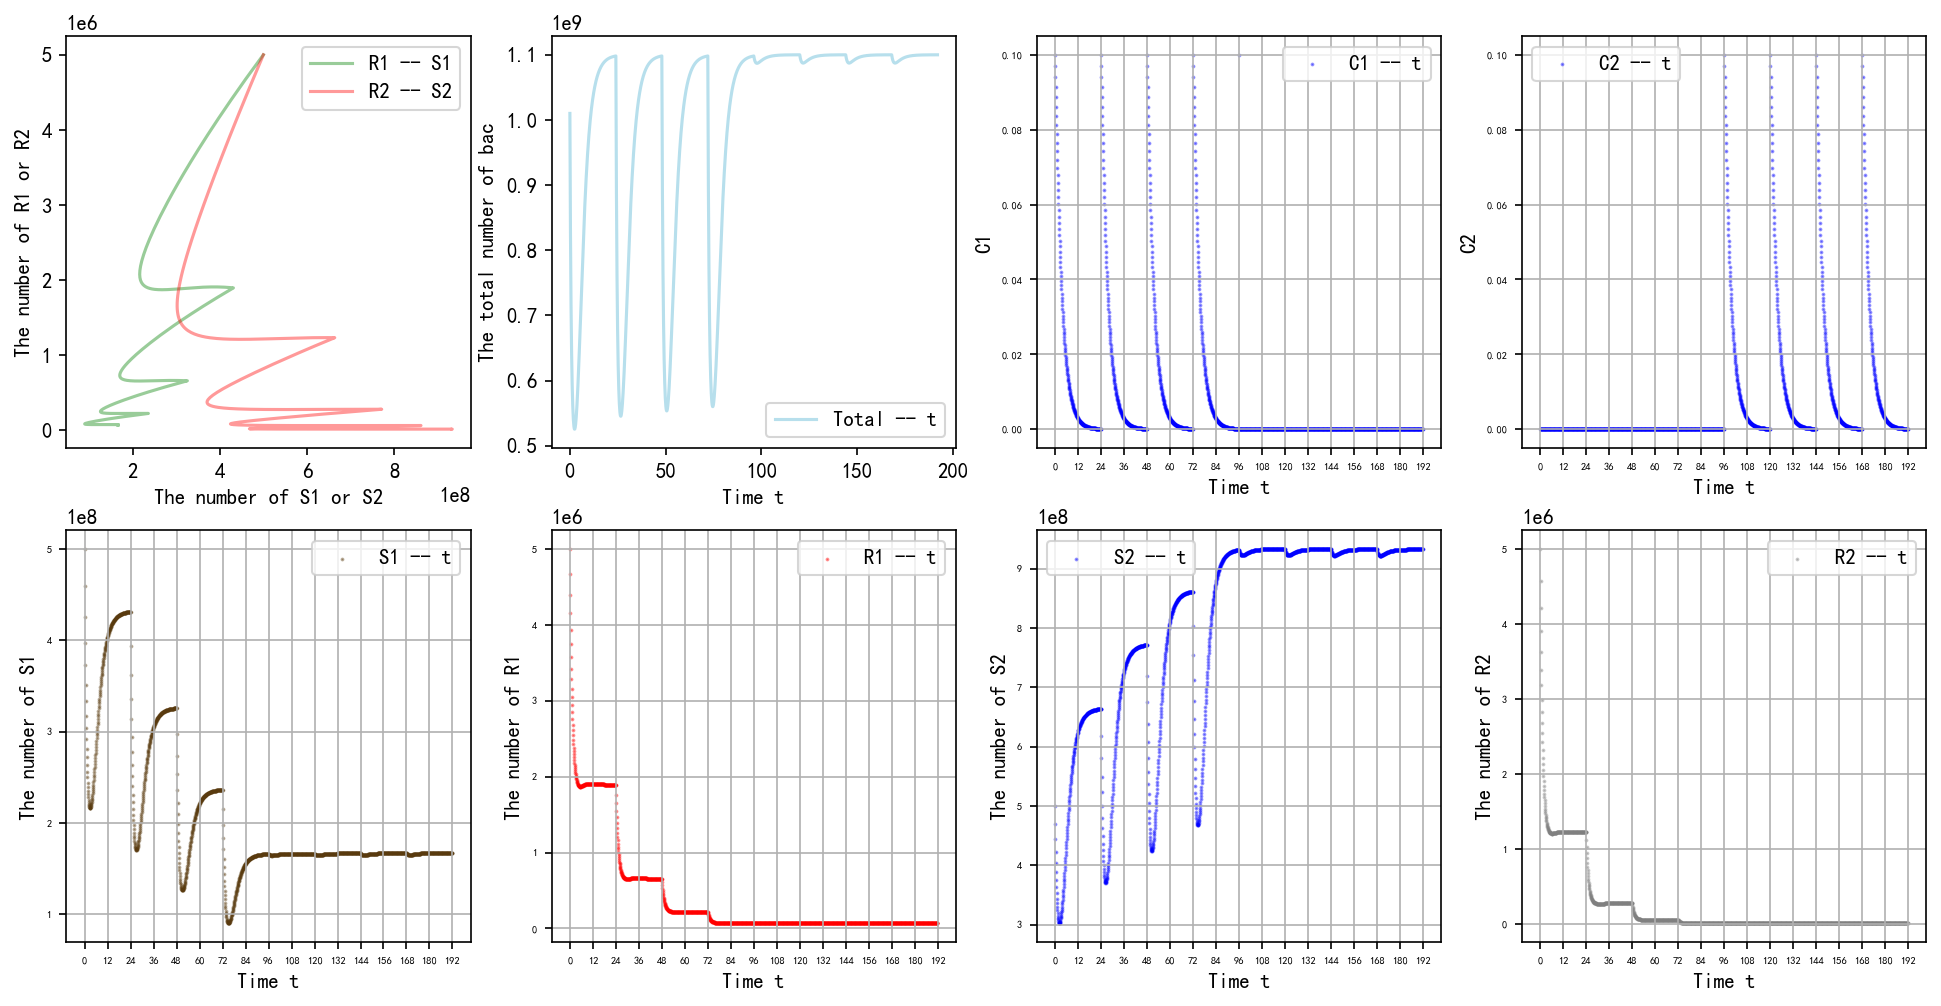

In [99]:
fig, axes = plt.subplots(2,4,figsize=(16,8),dpi = 150)
fig.patch.set_facecolor("white") #* 更改主图背景颜色，免得savefig的时候背景虚化
axes[0][0].plot(track3[:,0],track3[:,1],color = "green" , alpha = 0.4, label = "R1 -- S1")

axes[0][0].plot(track3[:,2],track3[:,3],color = "red" , alpha = 0.4, label = "R2 -- S2")

axes[0][1].plot(t3 , track3[:,0]+track3[:,1]+track3[:,2]+track3[:,3] , color = "#4bafd1" , alpha = 0.4, label = "Total -- t")

axes[0][2].scatter(t3 , C1_list_mod2 , s=0.7 , color = "blue" , alpha = 0.4 , label = "C1 -- t")

axes[0][3].scatter(t3 , C2_list_mod2 , s=0.7 , color = "blue" , alpha = 0.4 , label = "C2 -- t")

axes[1][0].scatter(t3 , track3[:,0],s=0.7 , color = "#593a0e" , alpha = 0.4, label = "S1 -- t")

axes[1][1].scatter(t3 , track3[:,1],s=0.7 , color = "red" , alpha = 0.4, label = "R1 -- t")

axes[1][2].scatter(t3 , track3[:,2],s=0.7 , color = "blue" , alpha = 0.4, label = "S2 -- t")

axes[1][3].scatter(t3 , track3[:,3],s=0.7 , color = "grey" , alpha = 0.4, label = "R2 -- t")


for i in range(2):
    for j in range(4):
        axes[i][j].legend()
# * 设置标签
axes[0][0].set_xlabel("The number of S1 or S2")
axes[0][0].set_ylabel("The number of R1 or R2")

axes[0][1].set_xlabel("Time t")
axes[0][1].set_ylabel("The total number of bac")

axes[0][2].set_xlabel("Time t")
axes[0][2].set_ylabel("C1")

axes[0][3].set_xlabel("Time t")
axes[0][3].set_ylabel("C2")

axes[1][0].set_xlabel("Time t")
axes[1][0].set_ylabel("The number of S1")

axes[1][1].set_xlabel("Time t")
axes[1][1].set_ylabel("The number of R1")

axes[1][2].set_xlabel("Time t")
axes[1][2].set_ylabel("The number of S2")

axes[1][3].set_xlabel("Time t")
axes[1][3].set_ylabel("The number of R2")

# * 设置刻度
x_major_locator = MultipleLocator(12) #* x坐标轴刻度间隔
axes[0][2].xaxis.set_major_locator(x_major_locator)
axes[0][2].tick_params(labelsize=5) #* 设置坐标轴刻度字体大小 避免看不清楚
axes[0][2].grid()
axes[0][3].xaxis.set_major_locator(x_major_locator)
axes[0][3].tick_params(labelsize=5)
axes[0][3].grid()
for i in range(4):
    axes[1][i].xaxis.set_major_locator(x_major_locator)
    axes[1][i].tick_params(labelsize=5)
    axes[1][i].grid()

plt.subplots_adjust(hspace = 0.2 , wspace = 0.2)

plt.savefig("Version_3.png")

plt.show()